1(a) Find the Hessian H of the average empirical loss function for logistic regression, and show that for any vector z, it holds true that $z^T Hz ≥ 0$, therefore, the cost function is convex.


$$g\left(z\right)=\frac{1}{1+e^{-z}} ,1-g\left(z\right)=\frac{e^{-z}}{1+e^{-z}},\ \ \ \ \ g^\prime\left(z\right)=\frac{e^{-z}}{\left(1+e^{-z}\right)^2}$$

$$log^\prime\left(g\left(z\right)\right)=\frac{1}{g\left(z\right)}g^\prime\left(z\right)=\frac{\frac{e^{-z}}{\left(1+e^{-z}\right)^2}}{\frac{1}{1+e^{-z}}}=\frac{e^{-z}}{1+e^{-z}}\ =\ 1-g(z)$$

$$log^\prime\left(1-g\left(z\right)\right)=\frac{-g^\prime\left(z\right)}{1-g\left(z\right)}=-\frac{1+e^{-z}}{e^{-z}}\ast\frac{e^{-z}}{\left(1+e^{-z}\right)^2}=-\frac{1}{1+e^{-z}}=-g\left(z\right)$$

$$\frac{\partial J\left(\theta\right)}{\partial\theta_j}=-\frac{1}{m}\sum_{i=1}^{m}{y^{\left(i\right)}\left(1-g\left(\theta^Tx^{\left(i\right)}\right)\right)x_j^{\left(i\right)}}-\left(1-y^{\left(i\right)}\right)g\left(\theta^Tx^{\left(i\right)}\right)x_j^{\left(i\right)}$$

$$=\frac{1}{m}\sum_{i=1}^{m}{\left[g\left(\theta^Tx^{\left(i\right)}\right)-y^{\left(i\right)}\right]x_j^{\left(i\right)}} = (g(X^T\theta)-y)^TX$$

$$H_{jk}=\frac{1}{m}\sum_{i=1}^{m}x_j^{\left(i\right)}g\left(z^{\left(i\right)}\right)\left(1-g\left(z^{\left(i\right)}\right)\right)x_k^{\left(i\right)} = (X * g(X^T\theta) * (1 - g(X^T\theta)))^TX$$

$$z^THz=\sum_{j=1}^{n}\sum_{k=1}^{n}z_jH_{jk}z_k$$
$$=\sum_{j=1}^{n}\sum_{k=1}^{n}z_j\frac{1}{m}\sum_{i=1}^{m}x_j^{\left(i\right)}g\left(z^{\left(i\right)}\right)\left(1-g\left(z^{\left(i\right)}\right)\right)x_k^{\left(i\right)}z_k$$
$$\frac{1}{m}\sum_{i=1}^{m}g\left(z^{\left(i\right)}\right)\left(1-g\left(z^{\left(i\right)}\right)\right)\sum_{j=1}^{n}x_j^{\left(i\right)}z_j\sum_{k=1}^{n}{x_k^{\left(i\right)}z_k}$$
$$=\frac{1}{m}\sum_{i=1}^{m}g\left({\theta^TX}^{\left(i\right)}\right)\left(1-g\left({\theta^TX}^{\left(i\right)}\right)\right)\sum_{j=1}^{n}x_j^{\left(i\right)}z_j\sum_{k=1}^{n}{x_k^{\left(i\right)}z_k\ >\ 0}$$



1(b) coding problem

In [41]:
import numpy as np
import util
from numpy.linalg import inv
from linear_model import LinearModel
import matplotlib.pyplot as plt
import pylab 

In [17]:
ds1_training_set_path = '../data/ds1_train.csv'
ds1_valid_set_path = '../data/ds1_valid.csv'
ds2_training_set_path = '../data/ds2_train.csv'
ds2_valid_set_path = '../data/ds2_valid.csv'

In [18]:
x_train, y_train = util.load_dataset(ds1_training_set_path, add_intercept=True)
x_valid, y_valid = util.load_dataset(ds1_valid_set_path, add_intercept=True)

In [19]:
x_train[0,:]

array([ 1.        ,  2.91180854, 60.35961272])

In [20]:
def main(train_path, eval_path, pred_path):
    """Problem 1(b): Logistic regression with Newton's Method.

    Args:
        train_path: Path to CSV file containing dataset for training.
        eval_path: Path to CSV file containing dataset for evaluation.
        pred_path: Path to save predictions.
    """
    x_train, y_train = util.load_dataset(train_path, add_intercept=True)

    # *** START CODE HERE ***
    model = LogisticRegression(eps=1e-5)
    model.fit(x_train, y_train)
    
    util.plot(x_train, y_train, self.theta, 'output/p01b_zj_{}.png'.format(pred_path[-5]))
    
    prediction
    x_eval, y_eval = util.load_dataset(eval_path, add_intercept=True)
    y_pred = model.predict(x_eval)
    np.savetxt(pred_path, y_pred > 0.5, fmt='%d')
    # *** END CODE HERE ***


class LogisticRegression(LinearModel):
    """Logistic regression with Newton's Method as the solver.

    Example usage:
        > clf = LogisticRegression()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        """Run Newton's Method to minimize J(theta) for logistic regression.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).
        """
        # *** START CODE HERE ***
        m = x.shape[0]
        n = x.shape[1]
        self.theta = np.zeros(n) #initialize theta
        current_theta = self.theta + 1
        
        while np.linalg.norm(current_theta - self.theta, ord = 1) >= self.eps:
            current_theta = np.copy(self.theta)
            h_x = 1/(1 + np.exp(-x.dot(self.theta))) #our hypothesis for logistics regression
            gradient_J_theta = (1/m) * (h_x - y).T.dot(x) #gradient
            H = (1/m) * (x * h_x[:, np.newaxis] * (1 - h_x)[:, np.newaxis]).T.dot(x) #Hessian matrix
            delta = inv(H).dot(gradient_J_theta) #the delta for Newton methond based on inverse of Hessian matrix and gradient vector
         
            self.theta -= delta # update theta for each iteration
        
        return self.theta
        
        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        # *** START CODE HERE ***

        pred = 1/(1 + np.exp(-x.dot(self.theta)))
        return pred
        # *** END CODE HERE ***



In [21]:
#train logistics regression
logit_reg = LogisticRegression()
logit_reg.fit(x_train, y_train)
y_pred = logit_reg.predict(x_valid)

In [22]:
logit_reg.theta

array([-6.26018491,  2.47707251, -0.0299125 ])

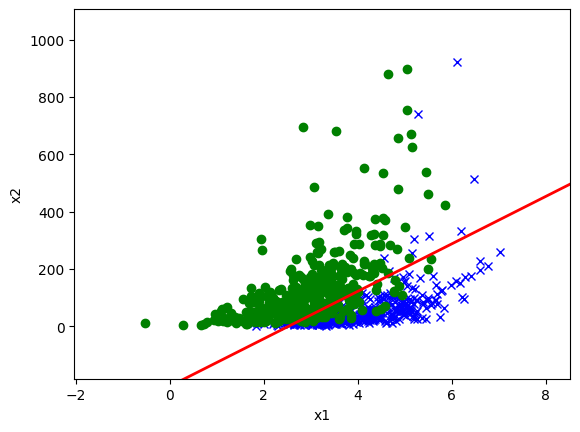

In [23]:
util.plot(x_train, y_train, theta=logit_reg.theta)

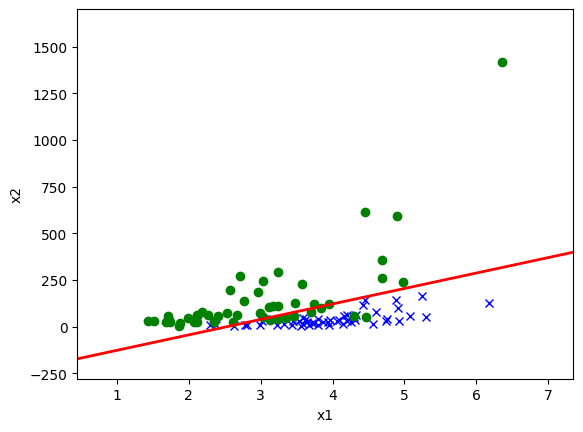

In [24]:
util.plot(x_valid, y_valid, theta=logit_reg.theta)

###GDA

In [98]:
def main(train_path, eval_path, pred_path):
    """Problem 1(e): Gaussian discriminant analysis (GDA)

    Args:
        train_path: Path to CSV file containing dataset for training.
        eval_path: Path to CSV file containing dataset for evaluation.
        pred_path: Path to save predictions.
    """
    # Load dataset
    x_train, y_train = util.load_dataset(train_path, add_intercept=False)
    x_eval, y_eval = util.load_dataset(eval_path, add_intercept=True)
    model = GDA()
    model.fit(x_train,y_train)
    model.predict(x_eval)

    # *** START CODE HERE ***
    # *** END CODE HERE ***


class GDA(LinearModel):
    """Gaussian Discriminant Analysis.

    Example usage:
        > clf = GDA()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        """Fit a GDA model to training set given by x and y.

        Args:
            x: Training example inputs. Shape (m, n).
            y: Training example labels. Shape (m,).

        Returns:
            theta: GDA model parameters.
        """
        #ZJ's notes: when fitting GDA, we do not add intercept as we are modeling p(x|y), adding intercept would 
        #make the sigma matrix singular
        # *** START CODE HERE ***
        m,n = x.shape
        self.theta = np.zeros(n+1)
        phi = np.sum(y)/m #parameter for p(y), prior distribution of y 
        mu_0 = np.sum(x[y==0], axis = 0)/y[y==0].shape[0] #mu (scalr or vector depends on # of features) 
                                                          #for class 0
        mu_1 = np.sum(x[y==1], axis = 0)/y[y==1].shape[0] #mu (scalr or vector depends on # of features)
                                                        #for class 1       
        dist = np.concatenate((x[y==0] - mu_0,x[y==1] - mu_1), axis = 0) #difference between data points to its mean
        sigma = dist.T.dot(dist)/m #covariance matrix of multi-variate normal distribution, note both classes
                                   #share the same covariance matrix, so that the decision boundary derived later is linear                             
        sigma_inv=inv(sigma) #inverse of covariance matrix
        
        #calculate theta of the sigmoid function from parameters of multi-variate normal distribution
        #to determine the decision boundary
        self.theta[0] = 0.5*(mu_0+mu_1).T.dot(sigma_inv).dot(mu_0-mu_1)-np.log((1-phi)/phi)
        self.theta[1:] = sigma_inv.dot(mu_1-mu_0)
        
        
        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        #during prediction, we map phi, mu, sigma into theta to calculate posteria probility p(y|x) with sigmoid function,
        #therefore, when prediction, we would introduce intercept so that we can use XT.theta in the formula
        # *** START CODE HERE ***
        m,n = x.shape
        prob_pred = 1 / (1 + np.exp(-x.dot(self.theta)))
        pred = np.zeros(m)
        pred[prob_pred>0.5]=1
        return pred
        # *** END CODE HERE


In [88]:
#GDA training and prediction
x_train, y_train = util.load_dataset(ds1_training_set_path, add_intercept=False)
x_eval, y_eval = util.load_dataset(ds1_valid_set_path, add_intercept=True)
GDA_clf  = GDA()
GDA_clf.fit(x_train,y_train)
GDA_clf.predict(x_eval)



In [89]:
def plot(x, y, theta_1, legend_1=None, theta_2=None, legend_2=None, title=None, correction=1.0):
    # Plot dataset
    plt.figure()
    plt.plot(x[y == 1, -2], x[y == 1, -1], 'bx', linewidth=2)
    plt.plot(x[y == 0, -2], x[y == 0, -1], 'go', linewidth=2)

    # Plot decision boundary (found by solving for theta_1^T x = 0)
    x1 = np.arange(min(x[:, -2]), max(x[:, -2]), 0.01)
    x2 = -(theta_1[0] / theta_1[2] * correction + theta_1[1] / theta_1[2] * x1)
    plt.plot(x1, x2, c='red', label=legend_1, linewidth=2)

    # Plot decision boundary (found by solving for theta_2^T x = 0)
    if theta_2 is not None:
        x1 = np.arange(min(x[:, -2]), max(x[:, -2]), 0.01)
        x2 = -(theta_2[0] / theta_1[2] * correction + theta_2[1] / theta_2[2] * x1)
        plt.plot(x1, x2, c='black', label=legend_2, linewidth=2)

    # Add labels, legend and title
    plt.xlabel('x1')
    plt.ylabel('x2')
    if legend_1 is not None or legend_2 is not None:
        plt.legend(loc="upper left")
    if title is not None:
        plt.suptitle(title, fontsize=12)

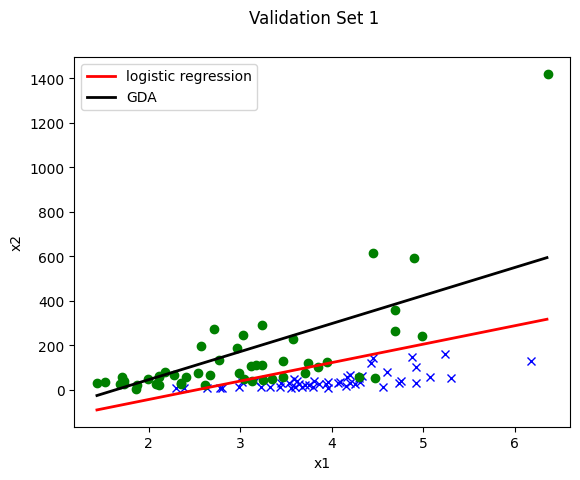

In [90]:
plot(x_valid, y_valid, theta_1=logit_reg.theta, legend_1='logistic regression', theta_2=GDA_clf.theta, legend_2='GDA', title='Validation Set 1')

In [91]:
GDA_clf.theta

array([-6.17158405,  2.22055506, -0.01763375])

In [99]:
#train logistics regression
x_train, y_train = util.load_dataset(ds2_training_set_path, add_intercept=True)
x_eval, y_eval = util.load_dataset(ds2_valid_set_path, add_intercept=True)
logit_reg = LogisticRegression()
logit_reg.fit(x_train, y_train)
y_pred = logit_reg.predict(x_eval)

#GDA training and prediction
x_train, y_train = util.load_dataset(ds2_training_set_path, add_intercept=False)
x_eval, y_eval = util.load_dataset(ds2_valid_set_path, add_intercept=True)
GDA_clf  = GDA()
GDA_clf.fit(x_train,y_train)
GDA_clf.predict(x_eval)



array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

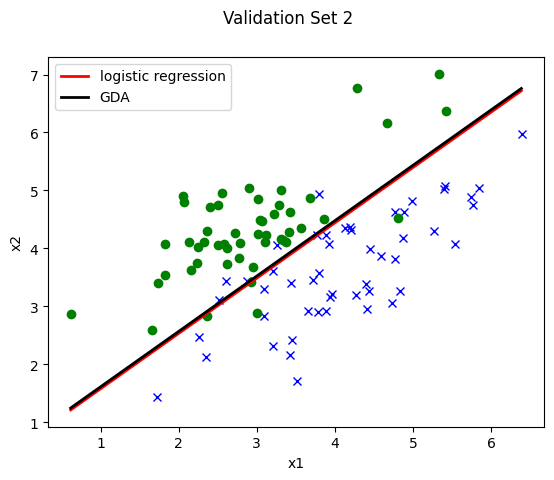

In [101]:
plot(x_eval, y_eval, theta_1=logit_reg.theta, legend_1='logistic regression', theta_2=GDA_clf.theta, legend_2='GDA', title='Validation Set 2')

General Discriminate Analysis assume  
1) p(x|y) follow multi-variate normal distribution

Logistics Regression.   
p(x|y) could follows different distribution which could also lead to sigmoid form of p(y|x), so LR is more relax
in the assumption of p(x|y)

In [37]:
from scipy import stats

In [ ]:
#GDA training and prediction
x_train, y_train = util.load_dataset(ds1_training_set_path, add_intercept=False)
x_eval, y_eval = util.load_dataset(ds1_valid_set_path, add_intercept=True)

In [42]:
x_train[y_train==1][:,1:]
#xt, _ = stats.boxcox(x)

array([[ 2.16566892,  4.01683225],
       [ 1.63150415,  2.52269515],
       [ 1.2249116 ,  1.90516439],
       [ 1.7903093 ,  3.49612089],
       [ 1.81853573,  0.7540652 ],
       [ 1.09611265,  0.85307702],
       [ 1.41792157,  2.55043999],
       [ 0.90874211,  0.12492667],
       [ 1.24321281,  3.74511331],
       [ 1.32228922,  3.34003336],
       [ 1.89029377,  2.91175734],
       [ 1.94394764,  2.22396637],
       [ 1.82690092,  3.49985578],
       [ 1.91375426,  2.25728493],
       [ 1.90986741,  2.79728287],
       [ 1.70242611,  1.94529009],
       [ 1.51599402,  1.32535859],
       [ 1.05202754,  0.11984932],
       [ 1.82212812,  4.42692797],
       [ 2.09726271,  3.93660812],
       [ 1.07681511,  0.61795358],
       [ 1.7503236 ,  1.76853391],
       [ 1.03759925,  0.47993812],
       [ 1.52714138, -0.97912296],
       [ 1.43113339,  0.19640277],
       [ 0.8169766 ,  0.81168539],
       [ 1.77834866,  2.50049134],
       [ 1.44636611,  2.35161905],
       [ 0.8345483 ,

((array([-2.54080803, -2.21381333, -2.02570486, -1.89007108, -1.7822905 ,
         -1.69195116, -1.61362541, -1.54410822, -1.48134173, -1.42392235,
         -1.37084793, -1.32137673, -1.27494362, -1.23110762, -1.18951765,
         -1.14988935, -1.11198904, -1.07562215, -1.04062485, -1.00685781,
         -0.97420145, -0.94255231, -0.91182023, -0.88192609, -0.85280006,
         -0.82438012, -0.79661094, -0.76944288, -0.74283125, -0.71673557,
         -0.69111912, -0.66594837, -0.64119266, -0.61682383, -0.59281592,
         -0.56914496, -0.54578871, -0.52272649, -0.49993902, -0.47740826,
         -0.45511731, -0.43305025, -0.4111921 , -0.38952868, -0.36804657,
         -0.34673298, -0.32557577, -0.30456332, -0.2836845 , -0.26292863,
         -0.24228542, -0.22174497, -0.20129765, -0.18093416, -0.16064543,
         -0.14042262, -0.12025708, -0.10014033, -0.08006402, -0.06001994,
         -0.03999995, -0.01999597,  0.        ,  0.01999597,  0.03999995,
          0.06001994,  0.08006402,  0.

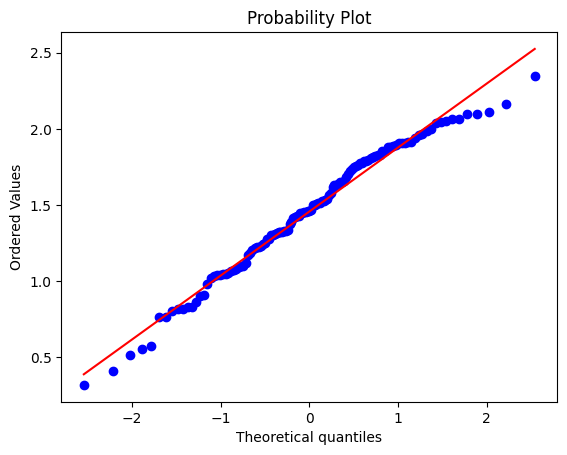

In [43]:
stats.probplot(x_train[y_train==1][:,1], dist="norm", plot=pylab)

((array([-2.54080803, -2.21381333, -2.02570486, -1.89007108, -1.7822905 ,
         -1.69195116, -1.61362541, -1.54410822, -1.48134173, -1.42392235,
         -1.37084793, -1.32137673, -1.27494362, -1.23110762, -1.18951765,
         -1.14988935, -1.11198904, -1.07562215, -1.04062485, -1.00685781,
         -0.97420145, -0.94255231, -0.91182023, -0.88192609, -0.85280006,
         -0.82438012, -0.79661094, -0.76944288, -0.74283125, -0.71673557,
         -0.69111912, -0.66594837, -0.64119266, -0.61682383, -0.59281592,
         -0.56914496, -0.54578871, -0.52272649, -0.49993902, -0.47740826,
         -0.45511731, -0.43305025, -0.4111921 , -0.38952868, -0.36804657,
         -0.34673298, -0.32557577, -0.30456332, -0.2836845 , -0.26292863,
         -0.24228542, -0.22174497, -0.20129765, -0.18093416, -0.16064543,
         -0.14042262, -0.12025708, -0.10014033, -0.08006402, -0.06001994,
         -0.03999995, -0.01999597,  0.        ,  0.01999597,  0.03999995,
          0.06001994,  0.08006402,  0.

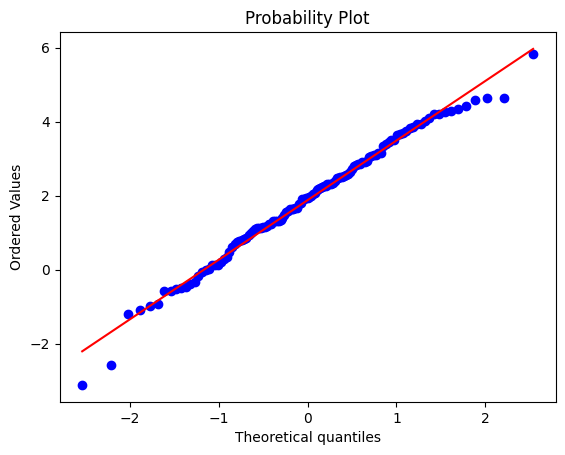

In [44]:
stats.probplot(x_train[y_train==1][:,2], dist="norm", plot=pylab)

((array([-3.23139352, -2.96874965, -2.82234796, ...,  2.82234796,
          2.96874965,  3.23139352]),
  array([ 0.29951518,  0.9155475 ,  0.96762529, ..., 10.0647207 ,
         10.16319335, 10.39871996])),
 (2.045151715417905, 6.564254138065629, 0.9592464890319038))

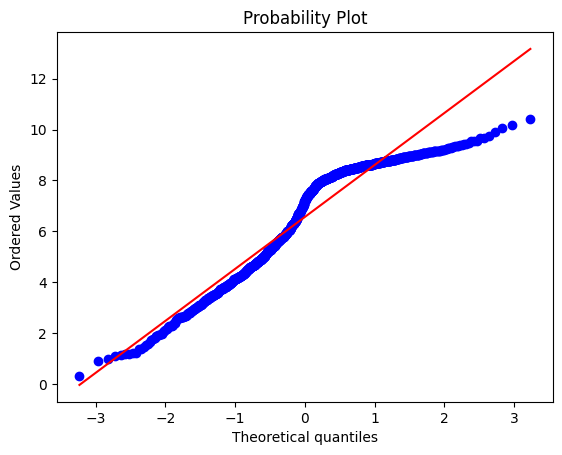

In [49]:
stats.probplot(x_train[y_train==0][:,1], dist="norm", plot=pylab)

In [48]:
min(x_train[y_train==0][:,1])

-6.700484817102131

((array([-3.23139352, -2.96874965, -2.82234796, ...,  2.82234796,
          2.96874965,  3.23139352]),
  array([-6.90456468, -6.78991078, -6.718636  , ...,  5.56859851,
          5.69279489,  6.03996928])),
 (2.588960730892441, -0.2763605286797916, 0.993948878799705))

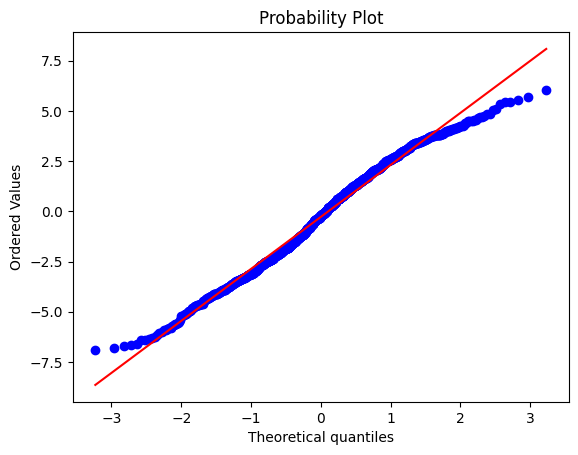

In [46]:
stats.probplot(x_train[y_train==0][:,2], dist="norm", plot=pylab)

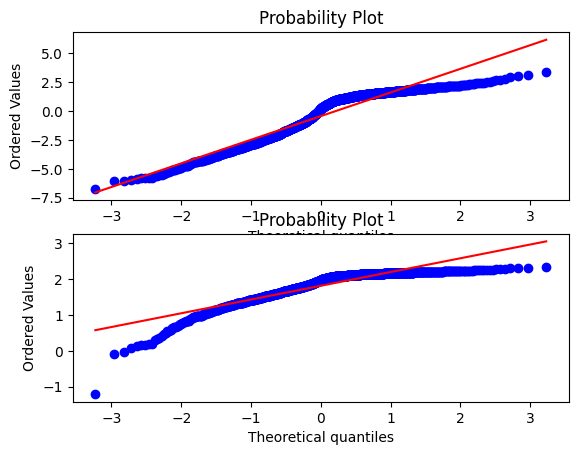

In [57]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
prob = stats.probplot(x_train[y_train==0][:,1], dist=stats.norm, plot=ax1)
ax2 = fig.add_subplot(212)
xt= np.log(x_train[y_train==0][:,1]+7)
prob = stats.probplot(xt, dist=stats.norm, plot=ax2)

In [53]:
xt

array([ 8.14919258,  2.94086669,  6.41086112, ..., 15.53387031,
       16.62915604, 15.00811207])

In [54]:
x_train[y_train==0][:,1]+7

array([5.45168101, 3.04113033, 4.72362536, ..., 8.10777214, 8.46109326,
       7.93522112])

In [5]:
from p01b_logreg_jz import LogisticRegression


In [27]:
ds3_training_set_path = '../data/ds3_train.csv'
ds3_valid_set_path = '../data/ds3_valid.csv'
ds3_test_set_path = '../data/ds3_test.csv'



In [31]:
# Part (c): Train and test on true labels
x_train, y_train = util.load_dataset(ds3_training_set_path, add_intercept=True)
_, t_train = util.load_dataset(ds3_training_set_path, label_col='t', add_intercept=True)
model = LogisticRegression(eps=1e-5)
model.fit(x_train, t_train)

x_eval, y_eval = util.load_dataset(ds3_valid_set_path, add_intercept=True)
_, t_eval = util.load_dataset(ds3_valid_set_path, label_col='t', add_intercept=True)

x_test, y_test = util.load_dataset(ds3_test_set_path, add_intercept=True)
_, t_test = util.load_dataset(ds3_test_set_path, label_col='t', add_intercept=True)

In [13]:

t_pred = model.predict(x_test)

Theta based on true label is:  [-0.9711418   2.73208784  1.07403478]


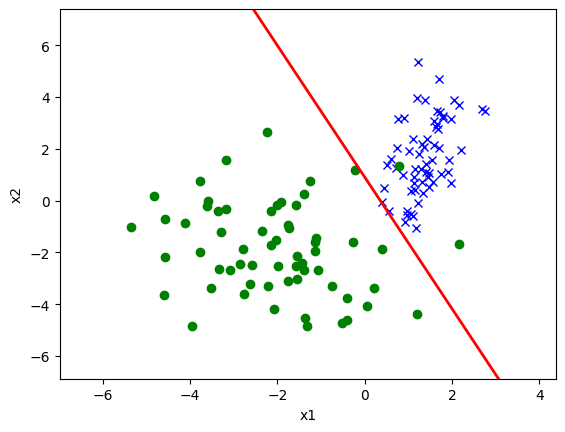

In [34]:
util.plot(x_test, t_test, model.theta)
print("Theta based on true label is: ", model.theta)

In [35]:
# Part (d): Train and test on y labels
model_y = LogisticRegression(eps=1e-5)
model_y.fit(x_train, y_train)

array([-2.91607454,  0.78596651,  0.09282768])

Theta based on y label is:  [-2.91607454  0.78596651  0.09282768]


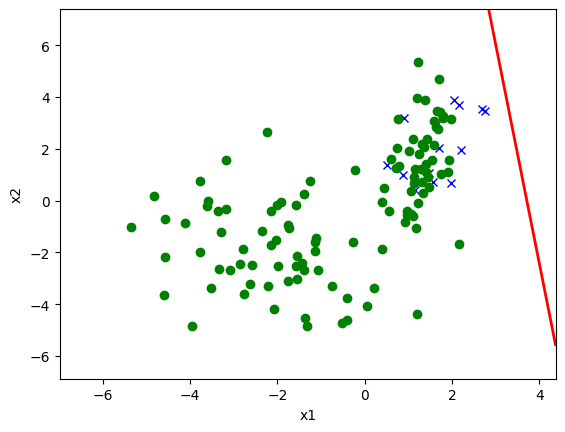

In [36]:
util.plot(x_test, y_test, model_y.theta)
print("Theta based on y label is: ", model_y.theta)